In [ ]:
"""
Predator and Prey Cellular Automaton
Developed by Fraser Love on 30/09/18
Dependencies: Pygame
Ran on CPU - Reccomended to use on High-Range CPU
"""

import pygame, sys, random, time
from pygame.locals import *

session = True
dimensions = (1920, 1080)
spacing = 0                         # Sets space between each cell
cell_size = 4                       # Sets the drawn size of each cell
frame_rate = 30
prey_probability = 0.3             # Probability of Prey reproducing - change for different results (choose 0.5 for spiral)
predator_probability = 0.2          # Probability of Predator reproducing - change for differnent results (chose 0.4 for spiral)
start_time = time.time()

cells_x = int(dimensions[0] / cell_size)
cells_y = int(dimensions[1] / cell_size)
cells = [[0 for x in range(cells_y)] for y in range(cells_x)]
new = [[0 for x in range(cells_y)] for y in range(cells_x)]

pygame.init()
display = pygame.display.set_mode((cells_x*(cell_size+spacing), cells_y*(cell_size+spacing)))
display.fill(pygame.Color("black"))
clock = pygame.time.Clock()


def create_grid():
    #  Assigning random values to our grid of cells: 0 - dead, 1 - prey, 2 - predator
    for x in range(cells_x):
        for y in range(cells_y):
            cells[x][y] = random.choice([0, 0, 1, 2])


def growth():
    for x in range(cells_x):
        for y in range(cells_y):
            if cells[x][y] == 1:
                new[x][y] = cells[x][y]
                for i in [-1, 0, 1]:
                    for j in [-1, 0, 1]:
                        if x + i < cells_x and y + j < cells_y and cells[x + i][y + j] == 0:
                            if random.uniform(0, 1) < prey_probability:
                                new[x + i][y + j] = 1
            if cells[x][y] == 2:
                new[x][y] = cells[x][y]
                die = True
                for i in [-1, 0, 1]:
                    for j in [-1, 0, 1]:
                        if x + i < cells_x and y + j < cells_y and new[x + i][y + j] == 1:
                            die = False
                            if random.uniform(0, 1) < predator_probability:
                                new[x + i][y + j] = 2
                if die == True:
                    new[x][y] = 0

def draw():
    for i in range(cells_x):
        for j in range(cells_y):
            if new[i][j] == 1:
                pygame.draw.rect(display, (255, 255, 255),
                                 (i * (cell_size + spacing), j * (cell_size + spacing), cell_size, cell_size), 0)
            if new[i][j] == 2:
                pygame.draw.rect(display, (70, 70, 70),
                                 (i * (cell_size + spacing), j * (cell_size + spacing), cell_size, cell_size), 0)
            cells[i][j] = new[i][j]
    pygame.display.update()
    clock.tick(frame_rate)

def run_automaton():
    generation = 1
    create_grid()
    while session:
        pygame.display.set_caption('Predator and Prey: Generation {}  Time: {}'.format(str(generation), round(time.time() - start_time,2)))
        display.fill("black")
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                pygame.quit(); sys.exit();

        growth()
        draw()
        generation += 1

if __name__ == "__main__":
    run_automaton()

In [255]:
import pygame, sys, random, time
import xarray as xr

In [256]:
# session = True
dimensions = (400, 200)
spacing = 0                         # Sets space between each cell
cell_size = 4                       # Sets the drawn size of each cell
# frame_rate = 30
prey_probability = 0.3             # Probability of Prey reproducing - change for different results (choose 0.5 for spiral)
predator_probability = 0.2          # Probability of Predator reproducing - change for differnent results (chose 0.4 for spiral)
# start_time = time.time()

In [257]:
cells_x = int(dimensions[0] / cell_size)
cells_y = int(dimensions[1] / cell_size)
cells = [[0 for x in range(cells_y)] for y in range(cells_x)]
new = [[0 for x in range(cells_y)] for y in range(cells_x)]

In [77]:

def create_grid():
    #  Assigning random values to our grid of cells: 0 - dead, 1 - prey, 2 - predator
    for x in range(cells_x):
        for y in range(cells_y):
            cells[x][y] = random.choice([0, 0, 1, 2])

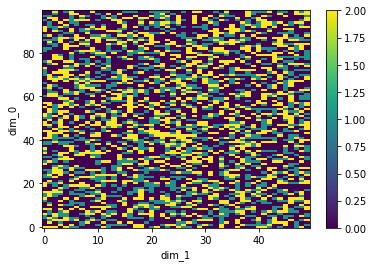

In [78]:
create_grid()
xr.DataArray(cells).plot(robust=True)

In [263]:
type(cells)
xr.DataArray(cells)

<xarray.DataArray (dim_0: 100, dim_1: 50)>
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])
Dimensions without coordinates: dim_0, dim_1

In [80]:
def growth():
    for x in range(cells_x):
        for y in range(cells_y):
            if cells[x][y] == 1:
                new[x][y] = cells[x][y]
                for i in [-1, 0, 1]:
                    for j in [-1, 0, 1]:
                        if x + i < cells_x and y + j < cells_y and cells[x + i][y + j] == 0:
                            if random.uniform(0, 1) < prey_probability:
                                new[x + i][y + j] = 1
            if cells[x][y] == 2:
                new[x][y] = cells[x][y]
                die = True
                for i in [-1, 0, 1]:
                    for j in [-1, 0, 1]:
                        if x + i < cells_x and y + j < cells_y and new[x + i][y + j] == 1:
                            die = False
                            if random.uniform(0, 1) < predator_probability:
                                new[x + i][y + j] = 2
                if die == True:
                    new[x][y] = 0

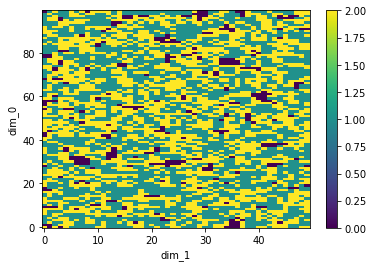

In [152]:
growth()

xr.DataArray(new).plot()

### CA on raster data

In [1]:
import xarray as xr
import rioxarray as rio
# import dask
# import datacube

import matplotlib.pyplot as plt
from dask.distributed import Client

%matplotlib inline

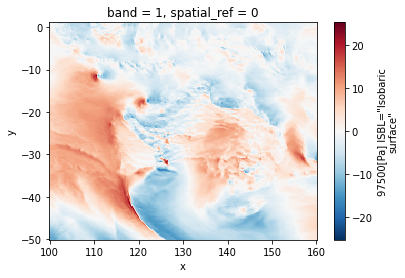

In [3]:
rr = rio.open_rasterio("/home/rvalavi/Downloads/gfs_vgrd_20220301_t00z_f010")
rr.plot()

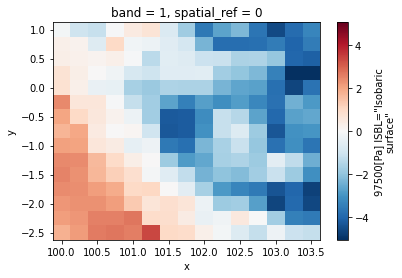

In [4]:
r = rr.isel(x = range(15), y = range(15))
r.plot()

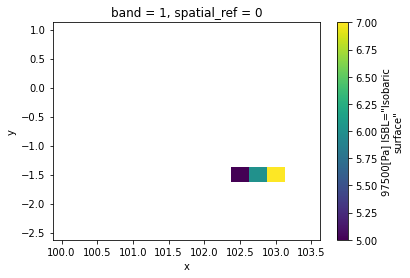

In [5]:
newr = r.copy()
newr[0] = None

## first case is for full array
# newr[0][10, 10:13] = [5,6,7]
newr[0].values[10, 10:13] = [5,6,7]
# newr
newr.plot()

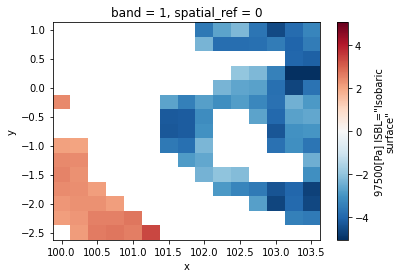

In [6]:
newr = r.copy()
newr[0] = None

xlen = r[0].shape[0]
ylen = r[0].shape[1]
for i in range(xlen):
    for j in range(ylen):
        if r[0][i, j] > 2:
            newr[0].values[i, j] = r[0][i, j]
        if r[0][i, j] < -2:
            newr[0].values[i, j] = r[0][i, j]

newr[0].plot()

In [7]:
newr

<xarray.DataArray (band: 1, y: 15, x: 15)>
array([[[      nan,       nan, ..., -3.883945, -3.353945],
        [      nan,       nan, ..., -4.063945, -3.523945],
        ...,
        [ 2.126055,  2.246055, ..., -3.453945, -3.593945],
        [      nan,  2.156055, ...,       nan,       nan]]])
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 100.0 100.2 100.5 100.8 ... 102.8 103.0 103.2 103.5
  * y            (y) float64 1.0 0.75 0.5 0.25 0.0 ... -1.75 -2.0 -2.25 -2.5
    spatial_ref  int64 0
Attributes:
    GRIB_COMMENT:                        v-component of wind [m/s]
    GRIB_DISCIPLINE:                     0(Meteorological)
    GRIB_ELEMENT:                        VGRD
    GRIB_FORECAST_SECONDS:               36000 sec
    GRIB_IDS:                            CENTER=7(US-NCEP) SUBCENTER=0 MASTER...
    GRIB_PDS_PDTN:                       0
    GRIB_PDS_TEMPLATE_ASSEMBLED_VALUES:  2 3 2 0 96 0 0 1 10 100 0 97500 255 0 0
    GRIB_PDS_TEMPLATE_NUMBERS:           2 3 2 0 96 0 0 0 1 0 0 0 10 100 0 0 ...
    GRIB_REF_TIME:                       1646092800 sec UTC
    GRIB_SHORT_NAME:                     97500-ISBL
    GRIB_UNIT:                           [m/s]
    GRIB_VALID_TIME:                     1646128800 sec UTC
    scale_factor:                        1.0
    add_offset:                          0.0
    long_name:                           97500[Pa] ISBL="Isobaric surface"

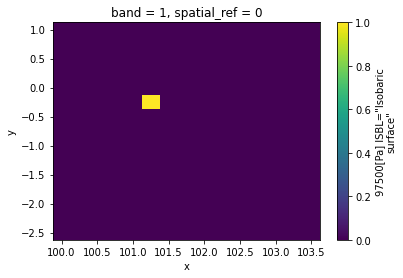

In [8]:
newr = r.copy()
newr[0] = 0
newr[0].values[5,5] = 1

targets = [[5,5]]

newr.plot()

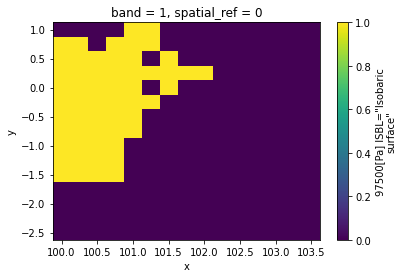

In [13]:
xlen = r[0].shape[0]
ylen = r[0].shape[1]

newrecords = targets.copy()
for cell in targets:
    x = cell[0]
    y = cell[1]
    for i in [-1, 0, 1]:
        for j in [-1, 0, 1]:
            if x + i < xlen and y + j < ylen and newr[0][x+i, y+j] == 0:
                if r[0].values[x+i, y+j] > r[0].values[x, y]:
                    newr[0].values[x+i, y+j] = 1
                    newrecords.append([x+i, y+j])


targets = newrecords
# r.plot()
newr.plot()

In [ ]:
nc.shape

(12, 681, 841)

## New Cellular Automata

In [105]:
import xarray as xr

In [173]:
cells = [1,0,1,0,0,0,0,1,0,1,1,1,0,0,0,1,1,1,0,0]
len(cells)

20

In [174]:
## just a simple rule for now
def rules(a, b, c):
    ruleset = [0,1,0,1,1,0,1,0]
    if a == 1 and b == 1 and c == 1:
        return ruleset[0]
    elif a == 1 and b == 1 and c == 0:
        return ruleset[1]
    elif a == 1 and b == 0 and c == 1:
        return ruleset[2]
    elif a == 1 and b == 0 and c == 0:
        return ruleset[3]
    elif a == 0 and b == 1 and c == 1:
        return ruleset[4]
    elif a == 0 and b == 1 and c == 0:
        return ruleset[5]
    elif a == 0 and b == 0 and c == 1:
        return ruleset[6]
    elif a == 0 and b == 0 and c == 0:
        return ruleset[7]  
    else:
        return 0

In [ ]:
def rules(a, b, c):
    ruleset = [0,1,1,1,1,0,1,1]

    pn = str(a) + str(b) + str(c)
    

In [185]:
fullarray = []

for j in range(20):

    # create a list with the same length
    newcells = [None] * len(cells)
    newcells[0] = cells[0]
    newcells[len(newcells) - 1] = cells[len(cells) -1]

    # loop through the cells
    for i in range(1, len(cells) -1 ):
        left = cells[i-1]
        middle = cells[i]
        right = cells[i+1]

        newstate = rules(left, middle, right)

        newcells[i] = newstate

    fullarray.append(newcells)

    cells = newcells

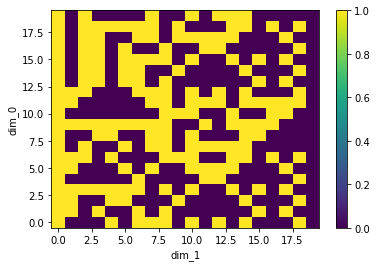

In [186]:
xr.DataArray(fullarray).plot()

In [200]:
a = str(0) + str(1) + str(1)
a

'011'

In [201]:
int(a, 2)

3

### Game of life

In [538]:
import numpy as np
import xarray as xr

In [539]:
np.random.randint(0, xlen -1)

16

In [778]:
xlen = 100
ylen = 100
cells = np.zeros((xlen, ylen))
# cells[5:7, 5:7] = 1

newcl = cells.copy()

# craete random alive cells
for i in range(1500):
    cells[np.random.randint(0, xlen -1), np.random.randint(0, ylen -1)] = 1

cells[5:7, 5:7]

array([[0., 0.],
       [0., 0.]])

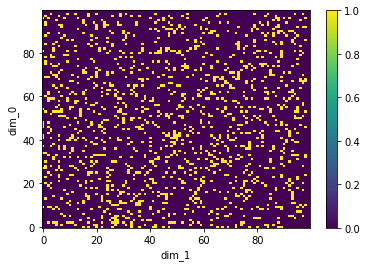

In [779]:
xr.DataArray(cells).plot()

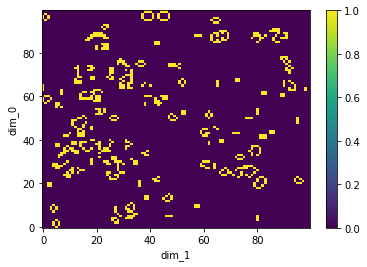

In [842]:
for x in range(xlen):
    for y in range(ylen):
        nb = []
        for i in [-1, 0, 1]:
            for j in [-1, 0, 1]:
                if x + i < xlen and y + j < ylen:
                    # only consider the neighbours
                    if abs(i)+abs(j) > 0:
                        nb.append(cells[x+i, y+j])
        if cells[x, y] == 1 and sum(nb) >= 4:
            newcl[x, y] = 0
        if cells[x, y] == 1 and sum(nb) <= 1:
            newcl[x, y] = 0
        if cells[x, y] == 1 and sum(nb) == 3 or sum(nb) == 2:
            newcl[x, y] = 1
        if cells[x, y] == 0 and sum(nb) == 3:
            newcl[x, y] = 1
        if cells[x, y] == 0 and sum(nb) != 3:
            newcl[x, y] = 0

cells = newcl.copy()
xr.DataArray(cells).plot()

In [849]:
0.05 * 480 * 270

6480.0

## Game of life animation

In [ ]:
import pygame, sys, random, time
from pygame.locals import *
import numpy as np

session = True
dimensions = (1200, 600)
spacing = 0                         # Sets space between each cell
cell_size = 4                       # Sets the drawn size of each cell
frame_rate = 30
start_time = time.time()

cells_x = int(dimensions[0] / cell_size)
cells_y = int(dimensions[1] / cell_size)
cells = np.zeros((cells_x, cells_y))


new = cells.copy()

pygame.init()
display = pygame.display.set_mode((cells_x*(cell_size+spacing), cells_y*(cell_size+spacing)))
display.fill(pygame.Color("black"))
clock = pygame.time.Clock()

def create_grid():
    for i in range(10000):
        cells[np.random.randint(0, cells_x - 1), np.random.randint(0, cells_y - 1)] = 1


def growth():
    for x in range(cells_x):
        for y in range(cells_y):
            nb = []
            for i in [-1, 0, 1]:
                for j in [-1, 0, 1]:
                    if x + i < cells_x and y + j < cells_y:
                        # only consider the neighbours
                        if abs(i)+abs(j) > 0:
                            nb.append(cells[x+i, y+j])
            if cells[x, y] == 1 and sum(nb) >= 4:
                new[x, y] = 0
            if cells[x, y] == 1 and sum(nb) <= 1:
                new[x, y] = 0
            if cells[x, y] == 1 and sum(nb) == 3 or sum(nb) == 2:
                new[x, y] = 1
            if cells[x, y] == 0 and sum(nb) == 3:
                new[x, y] = 1
            if cells[x, y] == 0 and sum(nb) != 3:
                new[x, y] = 0
    # cells = new.copy()



def draw():
    for i in range(cells_x):
        for j in range(cells_y):
            if new[i][j] == 1:
                pygame.draw.rect(display, (255, 255, 255),
                                 (i * (cell_size + spacing), j * (cell_size + spacing), cell_size, cell_size), 0)
            if new[i][j] == 0:
                pygame.draw.rect(display, (70, 70, 70),
                                 (i * (cell_size + spacing), j * (cell_size + spacing), cell_size, cell_size), 0)
            cells[i][j] = new[i][j]
    pygame.display.update()
    clock.tick(frame_rate)

def run_automaton():
    generation = 1
    create_grid()
    while session:
        pygame.display.set_caption('Predator and Prey: Generation {}  Time: {}'.format(str(generation), round(time.time() - start_time,2)))
        display.fill("black")
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                pygame.quit(); sys.exit();

        growth()
        draw()
        generation += 1

if __name__ == "__main__":
    run_automaton()